In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/question-pairs-dataset/questions.csv


In [2]:
df=pd.read_csv("/kaggle/input/question-pairs-dataset/questions.csv")

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.shape

(404351, 6)

In [5]:
df['question1'][0]

'What is the step by step guide to invest in share market in india?'

In [6]:
df['question2'][0]

'What is the step by step guide to invest in share market?'

In [7]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['is_duplicate'].value_counts()

is_duplicate
0    255045
1    149306
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7eda999e0f80>,
 [Text(-0.4392448712748321, 1.00849588152791, '0'),
  Text(0.43924495944034403, -1.0084958431278985, '1')],
 [Text(-0.23958811160445384, 0.5500886626515872, '63.1%'),
  Text(0.23958815969473307, -0.5500886417061264, '36.9%')])

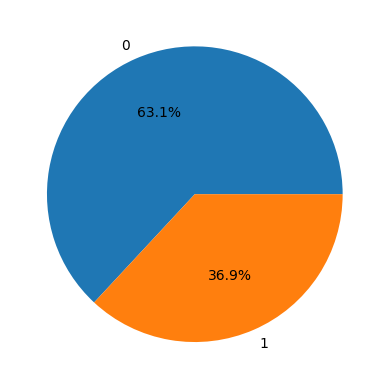

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.pie(df['is_duplicate'].value_counts(),autopct='%1.1f%%',labels=['0','1']
)

<Axes: xlabel='is_duplicate'>

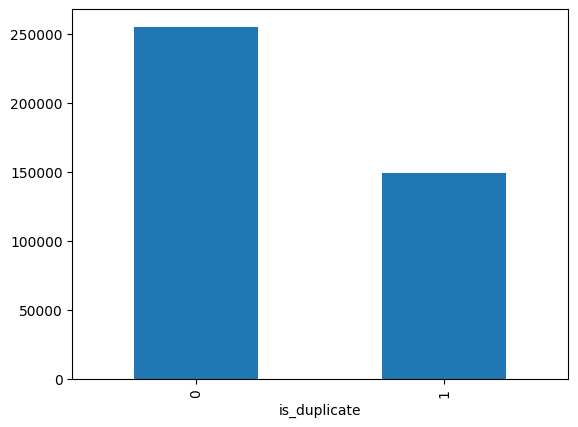

In [12]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [13]:
# it have some null value
# it is imbalance data

In [14]:
df=df.dropna()

In [15]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [16]:
new_df=df[['question1','question2','is_duplicate']]

In [17]:
new_df

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...
404346,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,What is one coin?,What's this coin?,0
404349,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [18]:
def lower(text):
    return text.lower().strip()

In [19]:
new_df['question1']=new_df['question1'].apply(lower)
new_df['question2']=new_df['question2'].apply(lower)

    

/tmp/ipykernel_23/1029302261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['question1']=new_df['question1'].apply(lower)
/tmp/ipykernel_23/1029302261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['question2']=new_df['question2'].apply(lower)


In [20]:
max_len=max(max(map(lambda x: len(x.split()),df['question1'])),max(map(lambda x: len(x.split()),df['question2'])))

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer( oov_token="<OOV>")
tokenizer.fit_on_texts(
    df['question1'].tolist() + df['question2'].tolist()
)

q1_seq = tokenizer.texts_to_sequences(df['question1'])
q2_seq = tokenizer.texts_to_sequences(df['question2'])

q1_pad = pad_sequences(q1_seq, maxlen=max_len, padding='post')
q2_pad = pad_sequences(q2_seq, maxlen=max_len, padding='post')

y = df['is_duplicate'].values


2025-12-18 07:04:18.915298: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766041459.082396      23 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766041459.130978      23 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766041459.523890      23 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766041459.523934      23 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766041459.523937      23 computation_placer.cc:177] computation placer alr

In [22]:
vocab_size=len(tokenizer.word_index)

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Embedding, GRU, Bidirectional,
    Dense, Concatenate
)
from tensorflow.keras.models import Model


In [24]:
embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=200,
    input_length=max_len
)

encoder = Bidirectional(
    GRU(256, return_sequences=False))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1766041492.765733      23 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1766041492.769642      23 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [25]:
input_q1 = Input(shape=(max_len,))
input_q2 = Input(shape=(max_len,))
q1_embed = embedding_layer(input_q1)
q2_embed = embedding_layer(input_q2)

q1_vec = encoder(q1_embed)
q2_vec = encoder(q2_embed)
q_sub = abs(q1_vec-q2_vec)
q_mul = q1_vec*q2_vec
merged = Concatenate()([q1_vec, q2_vec,q_sub,q_mul])
output = Dense(1, activation='sigmoid')(merged)
model1 = Model(inputs=[input_q1, input_q2], outputs=output)

model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model1.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 237)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 237)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 237, 200)  │ 19,120,600 │ input_layer[0][0… │
│ (Embedding)         │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 512)       │    703,488 │ embedding[0][0],  │
│ (Bidirectional)     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract (Subtract) │ (None, 512)       │          0 │ bidirectional[0]… │
│                     │                   │            │ bidirectional[1]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ absolute (Absolute) │ (None, 512)       │          0 │ subtract[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 512)       │          0 │ bidirectional[0]… │
│                     │                   │            │ bidirectional[1]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 2048)      │          0 │ bidirectional[0]… │
│ (Concatenate)       │                   │            │ bidirectional[1]… │
│                     │                   │            │ absolute[0][0],   │
│                     │                   │            │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │      2,049 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 19,826,137 (75.63 MB)

 Trainable params: 19,826,137 (75.63 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
tistory = model1.fit(
    [q1_pad, q2_pad],
    y,
    batch_size=512,
    epochs=5,
    validation_split=0.1
)


Epoch 1/5


I0000 00:00:1766041498.781030      68 cuda_dnn.cc:529] Loaded cuDNN version 91002


711/711 ━━━━━━━━━━━━━━━━━━━━ 375s 522ms/step - accuracy: 0.7309 - loss: 0.5259 - val_accuracy: 0.8043 - val_loss: 0.4148
Epoch 2/5
711/711 ━━━━━━━━━━━━━━━━━━━━ 373s 524ms/step - accuracy: 0.8365 - loss: 0.3617 - val_accuracy: 0.8306 - val_loss: 0.3736
Epoch 3/5
711/711 ━━━━━━━━━━━━━━━━━━━━ 373s 524ms/step - accuracy: 0.8829 - loss: 0.2725 - val_accuracy: 0.8325 - val_loss: 0.3844
Epoch 4/5
711/711 ━━━━━━━━━━━━━━━━━━━━ 371s 522ms/step - accuracy: 0.9112 - loss: 0.2152 - val_accuracy: 0.8431 - val_loss: 0.3889
Epoch 5/5
711/711 ━━━━━━━━━━━━━━━━━━━━ 371s 522ms/step - accuracy: 0.9313 - loss: 0.1715 - val_accuracy: 0.8459 - val_loss: 0.4092


In [27]:
model1.save('duplicate_question.h5')